In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 #batch size

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [3]:
from fastai.imports import *
from fastai.vision.all import *
from fastbook import *
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Capstone 2

/content/drive/MyDrive/Capstone 2


In [6]:
astronomy_labels = [
    "Mercury Planet",
    "Venus Planet",
    "Earth Planet",
    "Mars Planet",
    "Jupiter Planet",
    "Saturn Planet",
    "Uranus Planet",
    "Neptune Planet",
    "Milky Way Galaxy",
    "Andromeda Galaxy",
    "Triangulum Galaxy",
    "Orion Nebula",
    "Crab Nebula",
    "Eagle Nebula",
    "Black Holes",
    "Supernova Remnants",
    "Exoplanets"
]
len(astronomy_labels)

17

In [ ]:
images = search_images_ddg(astronomy_labels[0])
f"No of images => {len(images)} -- One Image URL => {images[0]}"

'No of images => 200 -- One Image URL => https://png.pngtree.com/png-clipart/20231021/original/pngtree-mercury-watercolor-planet-png-image_13392784.png'

In [ ]:
dest = "Mercury.jpg"
download_url(images[0], dest, show_progress=False)

Path('Mercury.jpg')

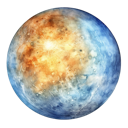

In [ ]:
image = Image.open(dest)
image.to_thumb(128,128)

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
    os.mkdir(data_path)

for astronomy_type in astronomy_labels:

    dest = f"{data_path}/{astronomy_type}"
    if not os.path.exists(dest):
        os.mkdir(dest)

    try:
      astronomy_image_urls = search_images_ddg(astronomy_type)
      download_images(dest, urls=astronomy_image_urls)
    except:
      continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3043) [Path('data/Mercury Planet/f54367f8-5155-40ee-8989-661d15e1fb91.png'),Path('data/Mercury Planet/d2f1712f-535e-4e40-a8c8-f13994bb8fbf.jpg'),Path('data/Mercury Planet/28e51900-d031-4083-aaea-8df5a90783d4.jpg'),Path('data/Mercury Planet/73f288e6-5b4b-4679-8e21-3c964bb728ad.jpg'),Path('data/Mercury Planet/398b78fe-561c-4a96-beac-e710c2b16303.jpg'),Path('data/Mercury Planet/1395cae5-0279-4a27-967d-6bc5a68c2b24.jpg'),Path('data/Mercury Planet/482a2930-1148-4773-829b-f69adee756b6.jpg'),Path('data/Mercury Planet/847c9c45-8e2d-4ea6-82e6-8a3936633b17.png'),Path('data/Mercury Planet/84f9405f-368b-4f6c-be51-3dfb04cada48.png'),Path('data/Mercury Planet/f14bf0bc-5f0c-4f7e-9d35-b985ca2d2cc0.jpg'),Path('data/Mercury Planet/766d8354-5ba3-4c3c-b3c4-e72e29157d1d.jpg'),Path('data/Mercury Planet/70e2689a-23ba-48d6-85e0-fd6ffb8b1663.png'),Path('data/Mercury Planet/a481edee-e677-4e20-9a16-5d7175ad08ce.jpg'),Path('data/Mercury Planet/56a94cf0-24ea-4f02-a5bc-a796e9553b96.jpg'),Path('data/Mercury Planet

In [ ]:
failed = verify_images(image_counts)
failed

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(#130) [Path('data/Mercury Planet/a481edee-e677-4e20-9a16-5d7175ad08ce.jpg'),Path('data/Mercury Planet/95e2b1ce-f0c3-4024-b6ca-0afa6066034e.jpg'),Path('data/Mercury Planet/3e21f893-e42b-4970-9cc6-47b28e9716f1.jpg'),Path('data/Mercury Planet/bf381827-87c6-4318-a8cd-666e90c280ee.jpg'),Path('data/Mercury Planet/3a48a258-db24-431b-b3c1-06f9dda9e70d.jpg'),Path('data/Mercury Planet/7899d527-d8b5-4a2f-8668-d1f37bdfde51.jpg'),Path('data/Mercury Planet/4dfb3c03-0547-4658-8063-09e900ed51cc.jpg'),Path('data/Mercury Planet/4ad3e9d0-12e5-4b9f-a78f-040a8188c7a7.jpg'),Path('data/Mercury Planet/13eed3aa-19e6-4208-9824-7dda2552342a.png'),Path('data/Mercury Planet/fc7910ca-ac47-47bd-92c3-ca51094fe931.jpg'),Path('data/Mercury Planet/76dd0ad6-518f-4b91-af46-67aa14942d58.jpg'),Path('data/Mercury Planet/eb3fe667-084c-4baa-8157-9d731984805e.jpg'),Path('data/Mercury Planet/b45fa36c-f5a1-4aed-b9db-b9c0135787eb.jpg'),Path('data/Venus Planet/b7c49539-c8d2-4126-9020-2db4875d4859.jpg'),Path('data/Venus Planet/3813

In [ ]:
failed.map(Path.unlink)

(#130) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

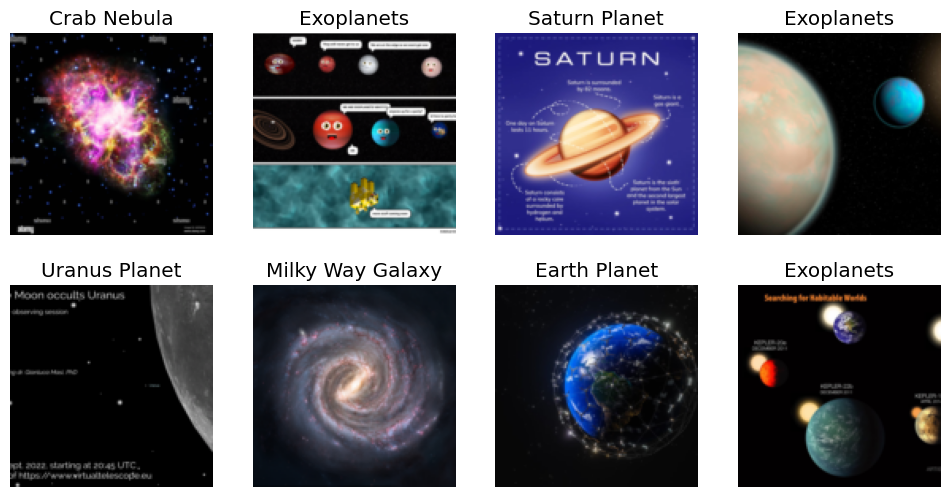

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

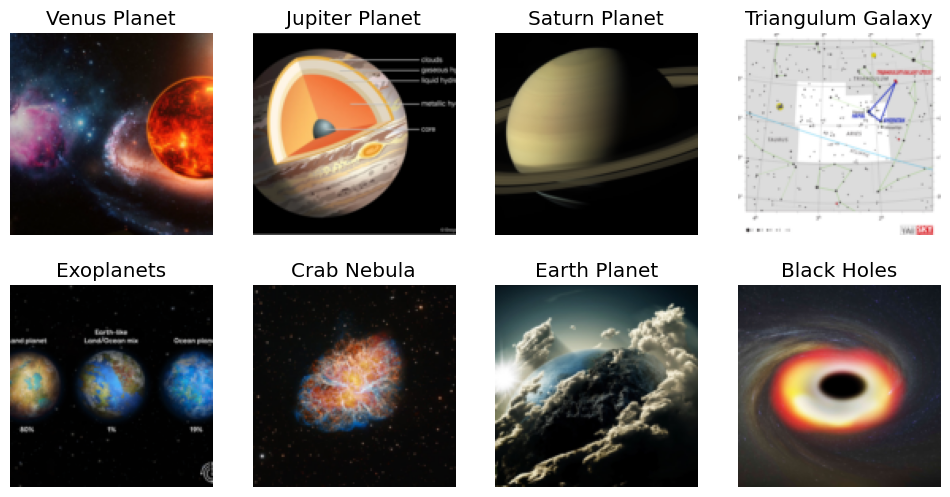

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (131220000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


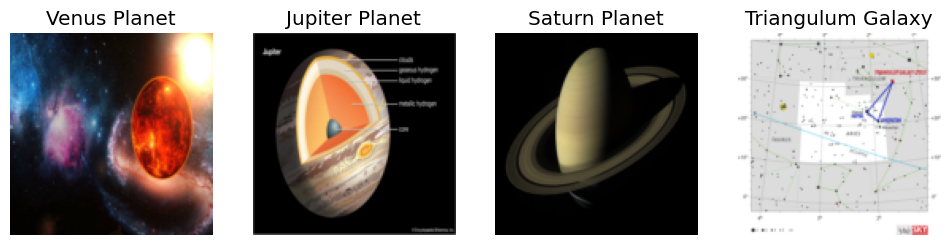

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

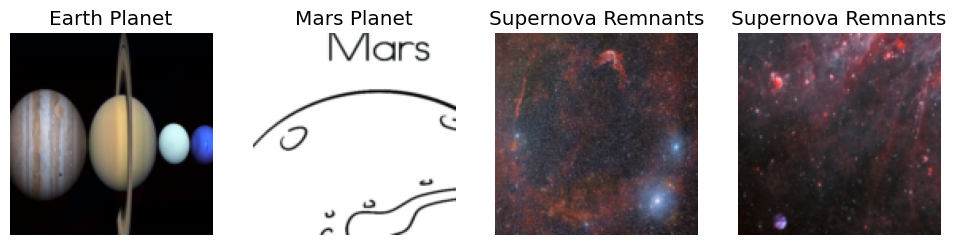

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


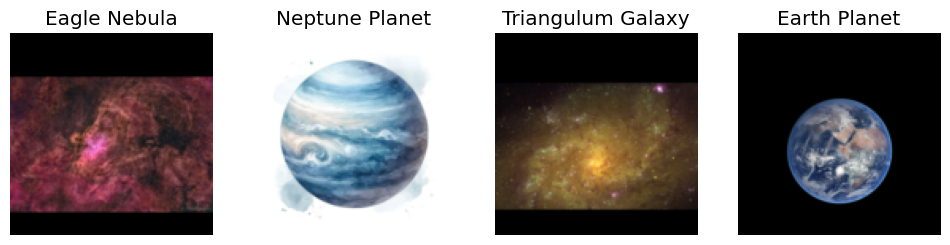

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=4, nrows=1)

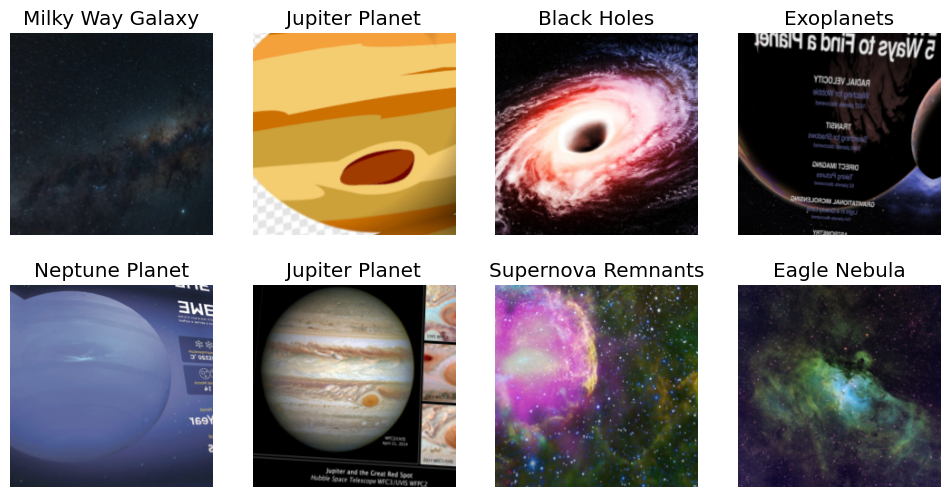

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "astronomy_dataloader_v0.pkl")